In [1]:
import warnings
original_data=pd.read_csv('./train.csv')
df = original_data.copy()
warnings.filterwarnings('ignore')


In [2]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [4]:
df['Cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

df['Survived'].mean()

# Percentage of Missing Values
df.groupby(['Survived']).mean()



,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin_null
Survived,,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887,0.876138
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408,0.602339


In [5]:
df=pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

### Mean/ Median and Mode 

In [6]:
# For categorical values also it will work, just use mode

median = df.Age.median()
median


def impute_nan(df, feature, median):
    df['Age_new']=df[feature].fillna(median)


impute_nan(df, 'Age', median)

df.head()


,Survived,Age,Fare,Age_new
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [7]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
Age_new       0
dtype: int64

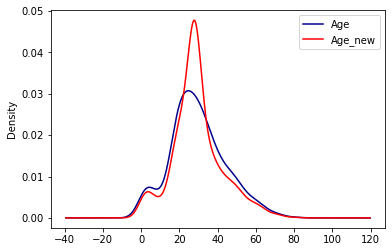

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax, color='darkblue')
df['Age_new'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


## Random Sample Imputation

 Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? 
It assumes that the data are missing completely at random(MCAR)

In [9]:
# From dropna the values were taken randomly and then were replaced by the sample in null values, and random state we have taken so that the values remain the same they don't keep on changing everytime we excute this code

df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=69)

530     2.0
754    48.0
336    29.0
187    45.0
390    36.0
       ... 
858    24.0
426    28.0
0      22.0
796    49.0
307    17.0
Name: Age, Length: 177, dtype: float64

In [10]:
def imputer(df, feature):
    df[feature+'_random']=df[feature]
    random_sample=df[feature].dropna().sample(df[feature].isnull().sum(), random_state=69)
    random_sample.index=df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature+'_random']= random_sample


#### This is a better way below

In [ ]:
def imputer_New(df, feature):
    random_sample = df[feature].dropna().sample(df[feature].isnull().sum(), random_state=69, replace=True)
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample


cols = df.columns
for i in cols:
    imputer_New(df, i)


In [11]:
imputer(df,'Age')
df.head()

,Survived,Age,Fare,Age_new,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


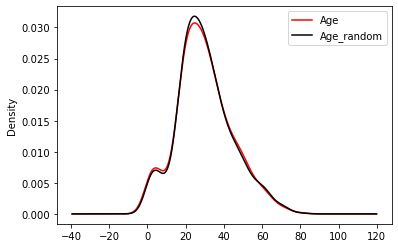

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='black')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


## Capturing Nan values with a new feature

In [13]:
df=pd.read_csv('./train.csv', usecols=['Survived', 'Age', 'Fare'])

In [14]:
# In the Age column wherever there is Nan value it will show 1 in Age_Captured
# Good for Algo's training it shows them, that there is something differnt over there

df['Age_captured']= np.where(df['Age'].isnull(),1,0)
df.head(7)

,Survived,Age,Fare,Age_captured
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0


## End Distribution
If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable.


In [15]:
df=pd.read_csv('./train.csv', usecols=['Survived', 'Fare', 'Age'])

median=df.Age.median()
extreme=df.Age.mean()+3*df.Age.std()

def impute(df,feature,median,extreme):
    df[feature+'_median']=df[feature].fillna(median)
    df[feature+'_end_distribution']=df[feature].fillna(extreme)



In [16]:
df.Age.isnull().sum()

177

In [17]:
impute(df,'Age',median,extreme)
df.head()

,Survived,Age,Fare,Age_median,Age_end_distribution
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


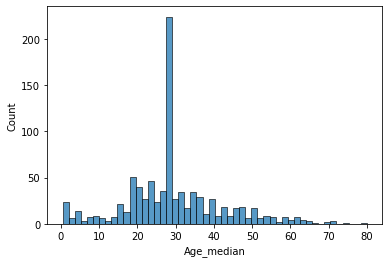

In [18]:
sns.histplot(x='Age_median', data=df, bins=50)
plt.show()



In [19]:
df['Age'].isnull().sum()

177

<AxesSubplot:xlabel='Age_end_distribution', ylabel='Count'>

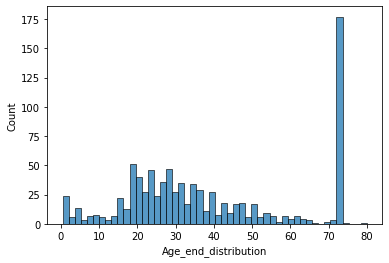

In [20]:
sns.histplot(x='Age_end_distribution', data=df, bins=50)

<AxesSubplot:xlabel='Age'>

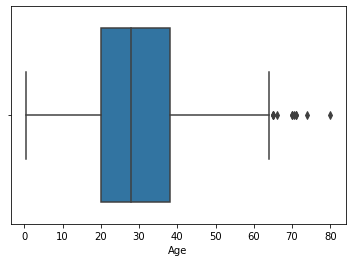

In [21]:
sns.boxplot('Age', data=df)

<AxesSubplot:xlabel='Age_end_distribution'>

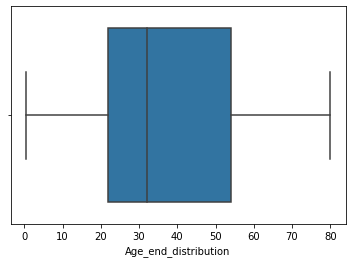

In [22]:
# All the outliers are removed by this method
sns.boxplot('Age_end_distribution', data=df)

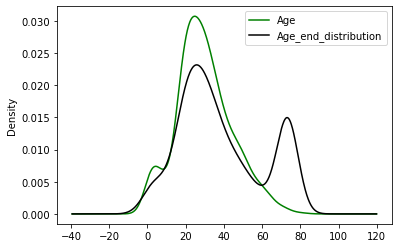

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax, color='green')
# df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_end_distribution.plot(kind='kde', ax=ax, color='black')


lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


In [24]:
df.Age.isnull().sum()

177

## Handling Categorical Values

### Frequent Categorical Imputarion

In [25]:
df=pd.read_csv('./train-2.csv', usecols=['GarageType', 'FireplaceQu', 'SalePrice', 'BsmtQual'])

In [26]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

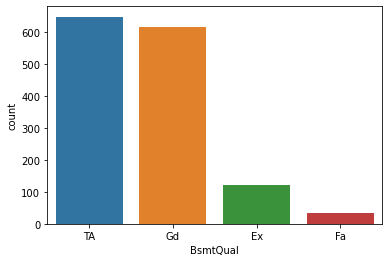

In [27]:
import seaborn as sns

df.groupby(['BsmtQual'])['BsmtQual']
sns.countplot(x='BsmtQual', data=df,order = df['BsmtQual'].value_counts().index)

#! One more Way
# df['FireplaceQu'].value_counts().plot.bar()


## Replacing Nan with Most Frequent Values

In [28]:
def impute_new (df,feature):
    most_frequent=df[feature].value_counts().index[0]
    df[feature].fillna(most_frequent, inplace=True)


for i in ['BsmtQual', 'GarageType', 'FireplaceQu']:
    impute_new(df, i)

df.isnull().sum()


BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [29]:
df.BsmtQual_nNew.unique()

AttributeError: 'DataFrame' object has no attribute 'BsmtQual_nNew'

## Another Way- Which is used most of the time

In [ ]:
#! First Way


# Replacing the Nan values with 1 and 0. 1 indicates that the value was missing and 0 that it was not missing 

import numpy as np
df['BsmtQual'+'_nNew']=np.where(df['BsmtQual'].isnull(),1,0)

most_frequent = df['BsmtQual'].value_counts().index[0]
df['BsmtQual'].fillna(most_frequent, inplace=True)

In [ ]:
#! Second Way 


# Now we replace the Nan value by creating a new variable in the place of Nan

def impute_1(df, feature):
    df[feature]= np.where(df[feature].isnull(),'Missing',df[feature])


for i in ['BsmtQual', 'GarageType', 'FireplaceQu']:
        impute_1(df,i)

df.head()



,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_nNew
0,Gd,Gd,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
